In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from datetime import date

In [2]:
def opendata(database):
    x = pd.read_csv(database)
    data = pd.DataFrame(x)
    return data

In [3]:
encuesta = opendata('Inscripciones-2020 - Inscripciones V2.csv')

In [4]:
#list(encuesta.columns)

In [5]:
clean_encuesta = encuesta[['Fecha',
                    'Fecha de nacimiento',
                    'GÃ©nero con el que te identificas',
                    'Estado Civil',
                    'Â¿Tienes dependientes econÃ³micos?',
                    'Â¿Tienes dependientes econÃ³micos? Other ',
                    'Â¿A cuÃ¡nto asciende el ingreso total mensual de tu familia?',
                    'Ciudad',
                    'CÃ³digo Postal de la zona donde vives',
                    'Correo electrÃ³nico',
                    'Ãšltimo nivel de estudios',
                    'Ãšltimo nivel de estudios Other',
                    'Â¿En quÃ© instituciÃ³n cursaste tu Ãºltimo grado de estudios?',
                    'OcupaciÃ³n actual',
                    'OcupaciÃ³n actual Other',
                    'Â¿CuÃ¡ntas horas a la semana estÃ¡s dispuest@ a dedicarle a un programa de formaciÃ³n/capacitaciÃ³n?',
                    'Â¿CuÃ¡l es la zona de tu preferencia para tomar cursos?',
                    'Â¿CÃ³mo llegaste a BEDU?',
                    'Â¿CÃ³mo llegaste a BEDU? Other',
                    'Estado',
                    'Municipio'
                   ]].copy()

In [6]:
clean_encuesta['Adj Create Date'] = pd.to_datetime(clean_encuesta['Fecha'])
clean_encuesta['Day'] = clean_encuesta['Adj Create Date'].dt.day
clean_encuesta['Year'] = clean_encuesta['Adj Create Date'].dt.year
clean_encuesta['Month'] = clean_encuesta['Adj Create Date'].dt.month
clean_encuesta['Adj Birthdate'] = pd.to_datetime(clean_encuesta['Fecha de nacimiento'])
clean_encuesta['Day B'] = clean_encuesta['Adj Birthdate'].dt.day
clean_encuesta['Year B'] = clean_encuesta['Adj Birthdate'].dt.year
clean_encuesta['Month B'] = clean_encuesta['Adj Birthdate'].dt.month
#clean_inscritos['Cumpleaños'] = pd.to_datetime(clean_inscritos['Fecha de nacimiento'])
#clean_inscritos['Date today'] = date.today()
clean_encuesta.to_csv("Encuesta inscritos limpia.csv")

## Define Functions

In [7]:
def cross_city(dataframe,columns):
    return pd.crosstab(dataframe['Estado'], dataframe[columns])

In [8]:
def cross_ingreso(dataframe,columns):
    return pd.crosstab(dataframe['Â¿A cuÃ¡nto asciende el ingreso total mensual de tu familia?'], dataframe[columns])

In [9]:
def cross_gender(dataframe,columns):
    return pd.crosstab(dataframe['GÃ©nero con el que te identificas'], dataframe[columns], margins = True)

In [10]:
def cross_maritalstatus(dataframe,columns):
    return pd.crosstab(dataframe['Estado Civil'], dataframe[columns], margins = True)

In [11]:
def age(fecha_nacimiento):
    fecha_actual = date.today()
    resultado = fecha_actual.year - fecha_nacimiento.year
    resultado -= ((fecha_actual.month, fecha_actual.day) < (fecha_nacimiento.month, fecha_nacimiento.day))
    return resultado

In [12]:
def fecha_nacimiento(dataframe):
    y = int(dataframe('Year B'))
    m = int(dataframe('Month B'))
    d = int(dataframe('Day B'))
    fecha = date(y,m,d)

In [13]:
def filter_year(dataframe,year):
    query = dataframe[(dataframe['Year'] == year)]
    return query

In [14]:
def filter_month(dataframe,month):
    query = dataframe[(dataframe['Month'] == month)]
    return query

In [15]:
def filter_day(dataframe,day):
    query = dataframe[(dataframe['Day'] == day)]
    return query 

In [16]:
def filter_city(dataframe,city):
    query = dataframe[(dataframe['Estado'] == city)]
    return query

In [17]:
def group(dataframe,column,filte=None):
    groupy = dataframe.groupby([column])[filte].count()
    return groupy     

### General Analysis

In [18]:
cross_city(clean_encuesta,'GÃ©nero con el que te identificas')

GÃ©nero con el que te identificas,Hombre,Mujer
Estado,,
Chihuahua,2,0
Ciudad de México,83,62
Colima,9,7
Jalisco,56,29
México,27,12
Nuevo León,3,1
Puebla,1,0
Querétaro,1,0
San Luis Potosí,1,0


In [19]:
cross_city(clean_encuesta,'Ãšltimo nivel de estudios')

Ãšltimo nivel de estudios,Bachillerato / Preparatoria,Doctorado,EducaciÃ³n Media Superior,EducaciÃ³n bÃ¡sica,Licenciatura,MaestrÃ­a
Estado,,,,,,
Chihuahua,0,0,0,0,1,1
Ciudad de México,1,2,5,1,108,26
Colima,0,0,2,0,13,1
Jalisco,2,0,7,1,60,14
México,0,0,0,0,34,5
Nuevo León,0,0,0,0,1,2
Puebla,0,0,0,0,0,1
Querétaro,0,0,0,0,1,0
San Luis Potosí,0,0,0,0,1,0


In [36]:
cross_city(clean_encuesta,'Â¿Tienes dependientes econÃ³micos? Other ')

Â¿Tienes dependientes econÃ³micos? Other,.,CÃ³nyugue,Esposa,Estudios,Mis mascotas,Perros,Solo yo
Estado,,,,,,,
Ciudad de México,0,0,1,0,1,1,0
Colima,0,0,0,1,0,0,1
Jalisco,1,0,0,0,0,0,0
Nuevo León,0,1,0,0,0,0,0


## Month

In [21]:
year = 2020
month = 4

In [22]:
year_2020 = filter_year(clean_encuesta,2020)

In [23]:
month = filter_month(year_2020,4)
month

,Fecha,Fecha de nacimiento,GÃ©nero con el que te identificas,Estado Civil,Â¿Tienes dependientes econÃ³micos?,Â¿Tienes dependientes econÃ³micos? Other,Â¿A cuÃ¡nto asciende el ingreso total mensual de tu familia?,Ciudad,CÃ³digo Postal de la zona donde vives,Correo electrÃ³nico,...,Estado,Municipio,Adj Create Date,Day,Year,Month,Adj Birthdate,Day B,Year B,Month B
64,04/03/2020 06:58,07/02/1990,Mujer,Solter@,No tengo dependientes econÃ³micos,NaN,"$5,000 - $10,000 MXN",CDMX,6720.0,luz.imaa@gmail.com,...,Ciudad de México,Cuauhtémoc,2020-04-03 06:58:00,3,2020,4,1990-07-02,2,1990,7
65,04/03/2020 03:53,19/06/1993,Hombre,Solter@,No tengo dependientes econÃ³micos,NaN,Prefiero no contestar,GDL,44870.0,josemanuel.mt1525@gmail.com,...,Jalisco,Guadalajara,2020-04-03 03:53:00,3,2020,4,1993-06-19,19,1993,6
66,04/03/2020 03:21,21/06/1981,Hombre,Vivo con mi pareja,Hij@s,NaN,Prefiero no contestar,GDL,45647.0,licalexd@gmail.com,...,Jalisco,Tlajomulco de Zúñiga,2020-04-03 03:21:00,3,2020,4,1981-06-21,21,1981,6
67,04/03/2020 00:38,12/12/1989,Mujer,Solter@,No tengo dependientes econÃ³micos,NaN,Prefiero no contestar,GDL,45040.0,iraislogu@gmail.com,...,Jalisco,Zapopan,2020-04-03 00:38:00,3,2020,4,1989-12-12,12,1989,12
246,13/04/2020 18:12,22/09/1973,Hombre,Casad@,Hij@s,NaN,"mÃ¡s de $50,000 MXN",CDMX,54140.0,fernandovera992@gmail.com,...,México,Tlalnepantla de Baz,2020-04-13 18:12:00,13,2020,4,1973-09-22,22,1973,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,29/04/2020 17:58,29/03/1980,Mujer,Solter@,No tengo dependientes econÃ³micos,NaN,"$30,000 - $50,000 MXN",CDMX,18300.0,cyn2903flo@gmail.com,...,NaN,NaN,2020-04-29 17:58:00,29,2020,4,1980-03-29,29,1980,3
299,29/04/2020 18:25,27/12/1976,Hombre,Vivo con mi pareja,Hij@s,NaN,"$30,000 - $50,000 MXN",CDMX,4730.0,humberto.blanco.se@gmail.com,...,Ciudad de México,Coyoacán,2020-04-29 18:25:00,29,2020,4,1976-12-27,27,1976,12
300,29/04/2020 22:31,20/04/1989,Hombre,Casad@,No tengo dependientes econÃ³micos,NaN,"$30,000 - $50,000 MXN",CDMX,1180.0,rmleonardom@gmail.com,...,Ciudad de México,Álvaro Obregón,2020-04-29 22:31:00,29,2020,4,1989-04-20,20,1989,4
301,30/04/2020 10:21,09/12/1978,Mujer,Solter@,Hij@s,NaN,"menos de $5,000 MXN",Colima,28979.0,angyavt12@gmail.com,...,Colima,Villa de Álvarez,2020-04-30 10:21:00,30,2020,4,1978-09-12,12,1978,9


In [24]:
cross_city(month,'Ãšltimo nivel de estudios')

Ãšltimo nivel de estudios,Bachillerato / Preparatoria,Doctorado,Licenciatura,MaestrÃ­a
Estado,,,,
Chihuahua,0,0,1,1
Ciudad de México,1,1,23,4
Colima,0,0,1,0
Jalisco,2,0,10,2
México,0,0,5,1
Nuevo León,0,0,0,1
Puebla,0,0,0,1
Querétaro,0,0,1,0
San Luis Potosí,0,0,1,0


In [25]:
#cross_city(month,'Ãšltimo nivel de estudios Other')

In [26]:
cross_city(month,'Â¿Tienes dependientes econÃ³micos?')

Â¿Tienes dependientes econÃ³micos?,Hij@s,Madre y/o Padre,No tengo dependientes econÃ³micos,Prefiero no contestar
Estado,,,,
Chihuahua,1,0,1,0
Ciudad de México,4,4,19,3
Colima,1,0,0,0
Jalisco,4,0,10,0
México,2,1,3,0
Nuevo León,0,0,2,0
Puebla,1,0,0,0
Querétaro,0,0,1,0
San Luis Potosí,1,0,0,0


In [27]:
cross_city(month,'Â¿Tienes dependientes econÃ³micos? Other ')

""


In [28]:
cross_city(month,'Â¿A cuÃ¡nto asciende el ingreso total mensual de tu familia?')

Â¿A cuÃ¡nto asciende el ingreso total mensual de tu familia?,"$10,000 - $20,000 MXN","$20,000 - $30,000 MXN","$30,000 - $50,000 MXN","$5,000 - $10,000 MXN",Prefiero no contestar,"menos de $5,000 MXN","mÃ¡s de $50,000 MXN"
Estado,,,,,,,
Chihuahua,0,0,1,0,0,0,1
Ciudad de México,5,6,6,5,6,0,2
Colima,0,0,0,0,0,1,0
Jalisco,3,1,1,1,7,0,1
México,2,0,0,2,0,1,1
Nuevo León,0,0,1,0,0,0,1
Puebla,0,0,0,0,1,0,0
Querétaro,0,0,0,0,1,0,0
San Luis Potosí,0,1,0,0,0,0,0


In [29]:
#fecha_nacimiento(month)
#edad = age(fecha_nacimiento)
#edad

In [30]:
cross_gender(month,'Â¿A cuÃ¡nto asciende el ingreso total mensual de tu familia?')

Â¿A cuÃ¡nto asciende el ingreso total mensual de tu familia?,"$10,000 - $20,000 MXN","$20,000 - $30,000 MXN","$30,000 - $50,000 MXN","$5,000 - $10,000 MXN",Prefiero no contestar,"menos de $5,000 MXN","mÃ¡s de $50,000 MXN",All
GÃ©nero con el que te identificas,,,,,,,,
Hombre,8,4,7,7,8,1,5,40
Mujer,3,4,3,2,7,1,1,21
All,11,8,10,9,15,2,6,61


In [31]:
cross_maritalstatus(month,'Â¿A cuÃ¡nto asciende el ingreso total mensual de tu familia?')

Â¿A cuÃ¡nto asciende el ingreso total mensual de tu familia?,"$10,000 - $20,000 MXN","$20,000 - $30,000 MXN","$30,000 - $50,000 MXN","$5,000 - $10,000 MXN",Prefiero no contestar,"menos de $5,000 MXN","mÃ¡s de $50,000 MXN",All
Estado Civil,,,,,,,,
Casad@,1,1,2,0,4,0,4,12
Solter@,10,5,7,9,10,2,2,45
Vivo con mi pareja,0,2,1,0,1,0,0,4
All,11,8,10,9,15,2,6,61


In [32]:
cross_maritalstatus(month,'OcupaciÃ³n actual')

OcupaciÃ³n actual,Emplead@ de medio tiempo,Emplead@ de tiempo completo,Emprendedor@,Empresari@,En busca de empleo,Estudiante,Freelancer,Propietari@ de Negocio,All
Estado Civil,,,,,,,,,
Casad@,2,8,1,0,1,0,0,0,12
Solter@,2,26,0,0,12,1,1,0,42
Vivo con mi pareja,0,2,0,1,0,0,0,1,4
All,4,36,1,1,13,1,1,1,58


In [33]:
%matplotlib inline

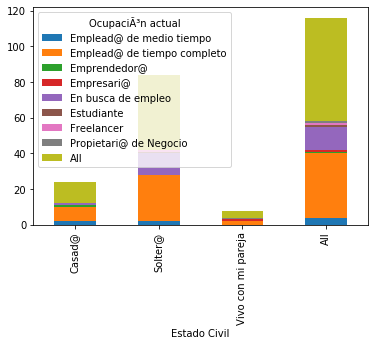

In [34]:
table = cross_maritalstatus(month,'OcupaciÃ³n actual')
table.plot.bar(stacked=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001749FF64388>],
      dtype=object)

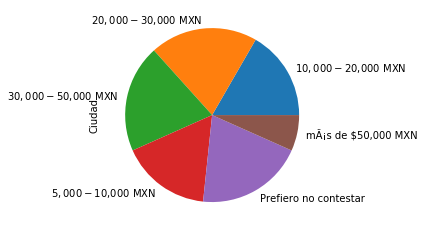

In [35]:
CDMX = filter_city(month,'Ciudad de México')
table = group(CDMX,'Â¿A cuÃ¡nto asciende el ingreso total mensual de tu familia?','Ciudad')
table.plot.pie(subplots=True)